In [32]:
# Three observable trends from the below data:
#     1) There are more rides in the urban city type
#     2) The fares are generally more expensive in the rural city type
#     3) As a company, it is best to work in the urban city type.  However, it is less profitable per ride, and 
#        potentially not as profitable for individual drivers due to significantly more drivers.

In [33]:
# dependencies
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [35]:
filepathCity_Data = '../resources/city_data.csv'
filepathRide_Data = "../resources/ride_data.csv"

cityData_df = pd.read_csv(filepathCity_Data)
rideData_df = pd.read_csv(filepathRide_Data)
cityData_df.head(10)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban
5,South Josephville,4,Urban
6,West Sydneyhaven,70,Urban
7,Travisville,37,Urban
8,Torresshire,70,Urban
9,Lisaville,66,Urban


In [36]:
rideData_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [37]:
# set variables for merging
avg_fare_city = rideData_df.groupby(["city"]).mean()["fare"].round(2)
tot_num_rides_city = rideData_df.groupby(['city']).count()["fare"]
tot_num_drivers_city = cityData_df.groupby(['city']).sum()['driver_count']
city_type_df = cityData_df[['city', 'type']]
#city_type = city_type.set_index('city')
city_type_df.sort_values('city', ascending=True).head()
#type(city_type)

,city,type
65,Alvarezhaven,Urban
18,Alyssaberg,Urban
94,Anitamouth,Suburban
53,Antoniomouth,Urban
43,Aprilchester,Urban


In [38]:
# finds duplicate city rows
pd.concat(g for _, g in cityData_df.groupby("city") if len(g) > 1)


,city,driver_count,type
84,Port James,15,Suburban
100,Port James,3,Suburban


In [40]:
# adds the two rows together 
cityData_df = cityData_df.groupby(['city', 'type'])['driver_count'].sum().reset_index()

# verifies rows were combined as expected
cityData_df.loc[cityData_df['city'] == "Port James"]

,city,type,driver_count
72,Port James,Suburban,18


In [41]:
# convert series into dataframes
avg_fare_city_df = pd.DataFrame(avg_fare_city)
tot_num_rides_city_df = pd.DataFrame(tot_num_rides_city)


In [42]:
# merge city data with avg fare per city, and clean
cityData_merged = pd.merge(avg_fare_city_df,cityData_df, left_index = True, right_on='city', how='outer')
cityData_merged = cityData_merged.rename(index=str, columns={"fare": "Average Fare", 
                                                             "type":"City Type", 
                                                             "driver_count": "Total Driver Count", 
                                                             "city": "City"})

# merge clean city data with total number of rides per city, and clean
cityData_merged = pd.merge(tot_num_rides_city_df,cityData_merged, left_index = True, right_on='City', how='outer')
cityData_merged = cityData_merged.rename(index=str, columns={"fare": "Total Number of Rides", 
                                                             "type":"City Type", 
                                                             "driver_count": "Total Driver Count", 
                                                             "city": "City"})

# organizing
cityData_merged = cityData_merged[["City", "City Type", "Total Driver Count", 
                                   "Average Fare", "Total Number of Rides"]]

# set the city as the index
cityData_merged = cityData_merged.set_index('City')

# display merged table
cityData_merged.head()



,City Type,Total Driver Count,Average Fare,Total Number of Rides
City,,,,
Alvarezhaven,Urban,21,23.93,31
Alyssaberg,Urban,67,20.61,26
Anitamouth,Suburban,16,37.32,9
Antoniomouth,Urban,21,23.62,22
Aprilchester,Urban,49,21.98,19


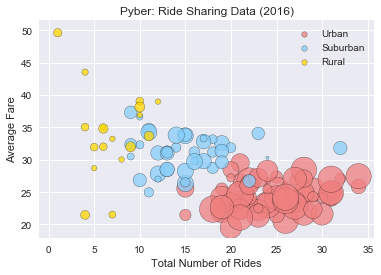

In [43]:
sns.set()

# urban scatter
urbanData = cityData_merged.loc[cityData_merged['City Type'] == "Urban"]
plt.scatter(urbanData['Total Number of Rides'], 
            urbanData['Average Fare'], 
            s=urbanData['Total Driver Count']*10, 
            color='lightcoral', 
            edgecolor = 'black',
            alpha=.75,
            label="Urban");

# suburban scatter
suburbanData = cityData_merged.loc[cityData_merged['City Type'] == "Suburban"]
plt.scatter(suburbanData['Total Number of Rides'], 
            suburbanData['Average Fare'], 
            s=suburbanData['Total Driver Count']*10, 
            color='lightskyblue', 
            edgecolor = 'black',
            alpha=.75,
            label="Suburban");

# rural scatter
ruralData = cityData_merged.loc[cityData_merged['City Type'] == "Rural"]
plt.scatter(ruralData['Total Number of Rides'], 
            ruralData['Average Fare'], 
            s=ruralData['Total Driver Count']*10, 
            color='gold', 
            edgecolor = 'black',
            alpha=.75,
            label="Rural");

plt.title("Pyber: Ride Sharing Data (2016)")
plt.xlabel('Total Number of Rides')
plt.ylabel('Average Fare')
#plt.legend(loc= "upper right")
lgnd = plt.legend(loc="upper right", fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()


In [44]:
cityData_merged.head()

,City Type,Total Driver Count,Average Fare,Total Number of Rides
City,,,,
Alvarezhaven,Urban,21,23.93,31
Alyssaberg,Urban,67,20.61,26
Anitamouth,Suburban,16,37.32,9
Antoniomouth,Urban,21,23.62,22
Aprilchester,Urban,49,21.98,19


In [45]:
# total fares by city
totFares_city = rideData_df.groupby(['city']).sum()['fare']
totFares_city_df = pd.DataFrame(totFares_city)

# merge with city type
cityData_merged = pd.merge(totFares_city_df,cityData_merged, left_index = True, right_index= True, how='outer')
cityData_merged = cityData_merged.rename(index=str, columns={"fare": "Total Fares"})
cityData_merged.head()

#totFares_city

,Total Fares,City Type,Total Driver Count,Average Fare,Total Number of Rides
city,,,,,
Alvarezhaven,741.79,Urban,21,23.93,31
Alyssaberg,535.85,Urban,67,20.61,26
Anitamouth,335.84,Suburban,16,37.32,9
Antoniomouth,519.75,Urban,21,23.62,22
Aprilchester,417.65,Urban,49,21.98,19


In [46]:
#total fares by city type
labels = ['Urban', 'Suburban', 'Rural']
#totalFares = rideData_df.groupby(["type"]).sum()["fare"]
#totalFares


In [47]:
pctFaresType = pd.DataFrame(cityData_merged.groupby(['City Type']).sum()['Total Fares'])
pctFaresType

,Total Fares
City Type,
Rural,4255.09
Suburban,19317.88
Urban,40078.34


In [48]:
type(pctFaresType)

pandas.core.frame.DataFrame

In [49]:
pctFaresType.index

Index(['Rural', 'Suburban', 'Urban'], dtype='object', name='City Type')

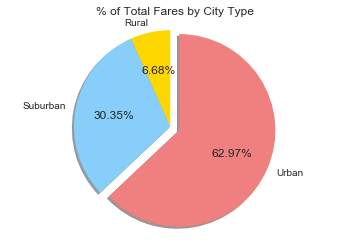

In [29]:
colors = ["gold", "lightskyblue", "lightcoral"]

explode = [0,0,0.1]

plt.pie(pctFaresType, labels=pctFaresType.index, autopct = "%1.2f%%", colors = colors, explode = explode, 
        shadow = True, startangle = 90)

plt.axis('equal')
plt.title("% of Total Fares by City Type")

plt.show()

In [20]:
pctRidesType = pd.DataFrame(cityData_merged.groupby(['City Type']).sum()['Total Number of Rides'])
pctRidesType

,Total Number of Rides
City Type,
Rural,125
Suburban,625
Urban,1625


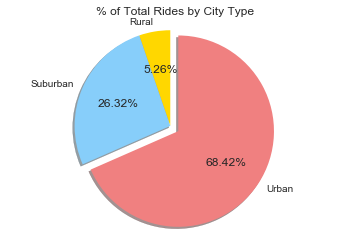

In [30]:
plt.pie(pctRidesType, labels=pctRidesType.index, autopct = "%1.2f%%", colors = colors, explode = explode, 
        shadow = True, startangle = 90)

plt.axis('equal')
plt.title("% of Total Rides by City Type")

plt.show()

In [22]:
pctDriversType = pd.DataFrame(cityData_merged.groupby(['City Type']).sum()['Total Driver Count'])
pctDriversType

,Total Driver Count
City Type,
Rural,104
Suburban,638
Urban,2607


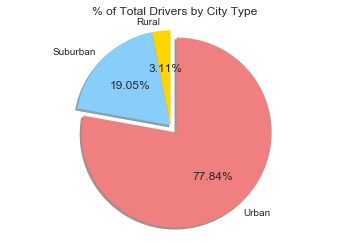

In [31]:
plt.pie(pctDriversType, labels=pctDriversType.index, autopct = "%1.2f%%", colors = colors, explode = explode, 
        shadow = True, startangle = 90)

plt.axis('equal')
plt.title("% of Total Drivers by City Type")

plt.show()